In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
df= pd.read_csv('/content/drive/MyDrive/Resource Files/Lesson 20_ Capstone Project Stock Market Data Analysis/Stock_Market_Data.csv')
df1= pd.read_csv('/content/drive/MyDrive/Resource Files/Lesson 20_ Capstone Project Stock Market Data Analysis/Stock_Market_Data.csv')

In [121]:
df1

,Date,Name,Open,High,Low,Close,Volume
0,02-01-2022,01.Bank,22.83,23.20,22.59,22.93,1842350.41
1,03-01-2022,01.Bank,23.03,23.29,22.74,22.90,1664989.63
2,04-01-2022,01.Bank,22.85,23.13,22.64,22.84,1354510.97
3,05-01-2022,01.Bank,22.91,23.20,22.70,22.98,1564334.81
4,06-01-2022,01.Bank,23.12,23.65,23.00,23.37,2586344.19
...,...,...,...,...,...,...,...
49153,26-06-2022,ZEALBANGLA,169.00,174.90,169.00,170.30,10480.00
49154,27-06-2022,ZEALBANGLA,174.10,176.00,166.90,167.50,13817.00
49155,28-06-2022,ZEALBANGLA,170.00,170.90,167.00,168.10,5214.00
49156,29-06-2022,ZEALBANGLA,167.10,169.00,164.90,165.10,6678.00


#Part 1: Data Cleaning and Exploration:
  * Calculate basic summary statistics for each column (mean, median, standard
deviation, etc.).
  * Explore the distribution of the 'Close' prices over time.
  * Identify and analyze any outliers (if any) in the dataset.

### Calculate basic summary statistics for each column (mean, median, standard deviation, etc.).

In [122]:
df.describe(include='all')

,Date,Name,Open,High,Low,Close,Volume
count,49158,49158,49158.000000,49158.000000,49158.000000,49158.000000,4.915800e+04
unique,122,412,NaN,NaN,NaN,NaN,NaN
top,27-06-2022,01.Bank,NaN,NaN,NaN,NaN,NaN
freq,409,122,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,157.869018,159.588214,155.906364,157.351462,5.619999e+05
std,NaN,NaN,520.191624,523.348078,517.136149,519.711667,1.276909e+06
min,NaN,NaN,3.900000,3.900000,3.000000,3.800000,1.000000e+00
25%,NaN,NaN,19.000000,19.300000,18.700000,19.000000,5.109475e+04
50%,NaN,NaN,40.300000,41.000000,39.535000,40.100000,1.824160e+05
75%,NaN,NaN,89.400000,90.500000,87.700000,88.700000,5.401398e+05


In [123]:
df1['Date']=pd.to_datetime(df1['Date'], dayfirst=True)

In [124]:
!pip install seaborn --upgrade

### Explore the distribution of the 'Close' prices over time.
shown only for three company: IBNSINA, GP, SQURPHARMA


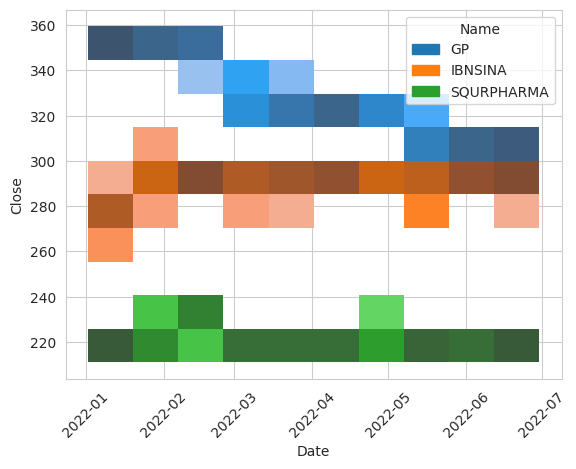

In [125]:
company_name=['IBNSINA','GP','SQURPHARMA']
df_distribution= df1[df1['Name'].isin(company_name)]
close_over_price= sns.histplot(x='Date',y='Close', data=df_distribution, hue='Name')
close_over_price.tick_params(axis='x', labelrotation = 45)
sns.set_style("whitegrid")

## Identify and analyze any outliers (if any) in the dataset.
shown only for three company: IBNSINA, GP, SQURPHARMA

In [126]:
# Find Outlier Function

def findOutliers(dataset):
    outliers = []
    Q2 = dataset.median()
    Q1 = dataset.describe()[4]
    Q3 = dataset.describe()[6]

    IQR = Q3 - Q1
    lf = Q1 - 1.5 * IQR
    uf = Q3 + 1.5 * IQR
    for x in dataset:
        if x < lf or x > uf:
            outliers.append(x)
    return outliers

In [127]:
df_to_detect_outliers= df_distribution[df_distribution['Name']== 'IBNSINA']
df_to_detect_outliers.drop(columns=["Name","Date"], inplace= True)

# Iterating through all columns of the dataframe
print('Company name: IBNSINA')
for column in df_to_detect_outliers.columns:
    # Get data for the current column
    column_data = df_to_detect_outliers[column]

    # Call your outlier detection function with the column data
    outliers = findOutliers(column_data)

    # Print the outliers for the current column (optional)
    print(f"Outliers in '{column}': {outliers}")

Company name: IBNSINA
Outliers in 'Open': [271.0, 270.4, 270.5, 272.0, 273.0, 274.0, 274.0, 275.0, 305.0]
Outliers in 'High': [272.0, 271.7, 270.5, 273.0, 273.0, 275.5, 277.8]
Outliers in 'Low': [270.1, 268.7, 267.0, 269.0, 268.1, 269.9, 270.0, 272.2, 271.4]
Outliers in 'Close': [270.4, 268.9, 270.0, 271.0, 269.6, 274.3]
Outliers in 'Volume': [208370.0, 160105.0, 214781.0, 193431.0, 84791.0, 85018.0, 60673.0, 62187.0]


In [128]:
df_to_detect_outliers= df_distribution[df_distribution['Name']== 'GP']
df_to_detect_outliers.drop(columns=["Name","Date"], inplace= True)

# Iterating through all columns of the dataframe
print('Company name: GP')
for column in df_to_detect_outliers.columns:
    # Get data for the current column
    column_data = df_to_detect_outliers[column]

    # Call your outlier detection function with the column data
    outliers = findOutliers(column_data)

    # Print the outliers for the current column (optional)
    print(f"Outliers in '{column}': {outliers}")

Company name: GP
Outliers in 'Open': []
Outliers in 'High': []
Outliers in 'Low': []
Outliers in 'Close': []
Outliers in 'Volume': [346471.0, 278829.0, 329601.0]


In [129]:
df_to_detect_outliers= df_distribution[df_distribution['Name']== 'SQURPHARMA']
df_to_detect_outliers.drop(columns=["Name","Date"], inplace= True)

# Iterating through all columns of the dataframe
print('Company name: SQURPHARMA')
for column in df_to_detect_outliers.columns:
    # Get data for the current column
    column_data = df_to_detect_outliers[column]

    # Call your outlier detection function with the column data
    outliers = findOutliers(column_data)

    # Print the outliers for the current column (optional)
    print(f"Outliers in '{column}': {outliers}")

Company name: SQURPHARMA
Outliers in 'Open': []
Outliers in 'High': []
Outliers in 'Low': []
Outliers in 'Close': []
Outliers in 'Volume': [905379.0, 1090401.0, 948436.0, 981736.0, 1146540.0]


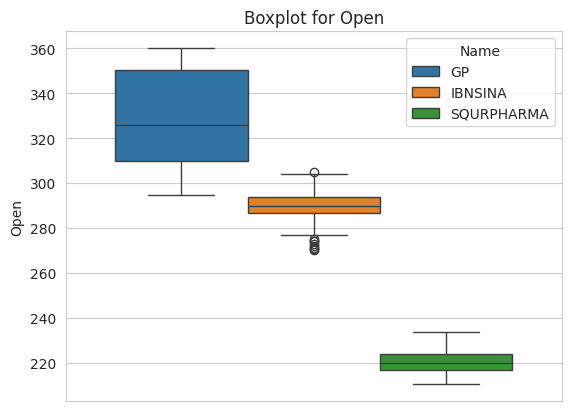

In [130]:
sns.boxplot(y = 'Open', data = df_distribution, hue='Name')
plt.title('Boxplot for Open');

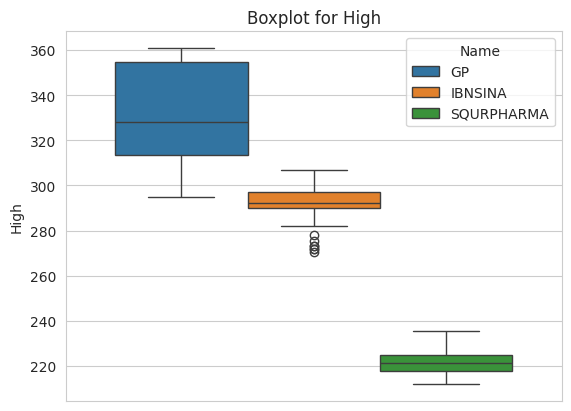

In [131]:
sns.boxplot(y = 'High', data = df_distribution, hue='Name')
plt.title('Boxplot for High');

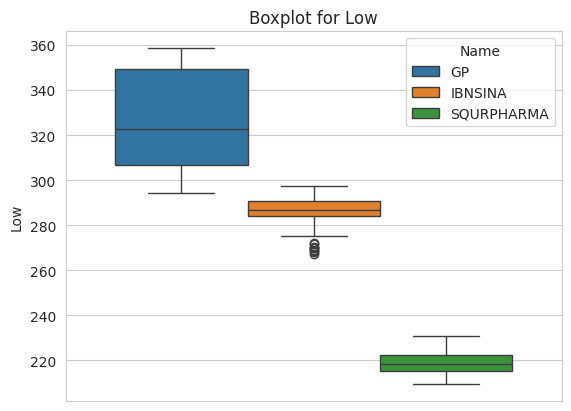

In [132]:
sns.boxplot(y = 'Low', data = df_distribution, hue='Name')
plt.title('Boxplot for Low');

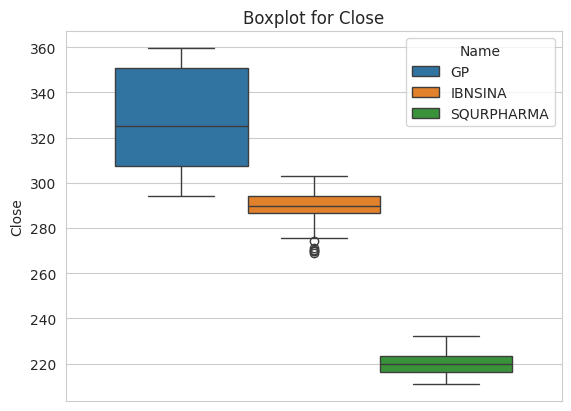

In [133]:
sns.boxplot(y = 'Close', data = df_distribution, hue='Name')
plt.title('Boxplot for Close');

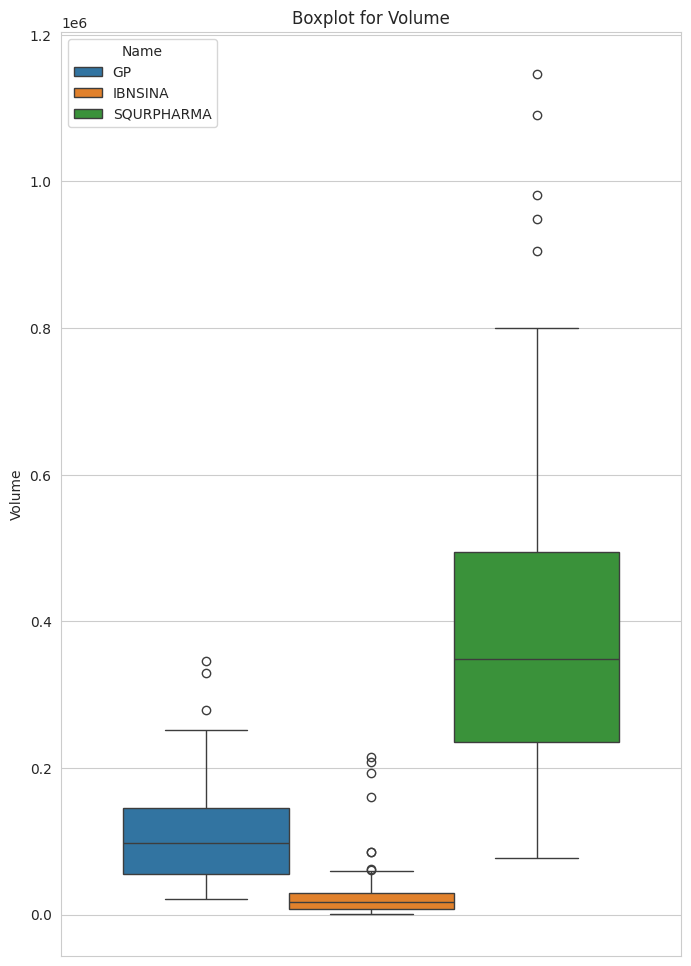

In [134]:
plt.figure(figsize=(8, 12))
sns.boxplot(y = 'Volume', data = df_distribution, hue='Name')
plt.title('Boxplot for Volume');

# Part 2: Time Series Analysis / Rolling Window / Moving Averages :

  * Create a line chart to visualize the 'Close' prices over time.
  * Calculate and plot the daily percentage change in closing prices.
  * Investigate the presence of any trends or seasonality in the stock prices.
  * Apply moving averages to smooth the time series data in 15/30 day intervals against the original graph.
  * Calculate the average closing price for each stock.
  * Identify the top 5 and bottom 5 stocks based on average closing price

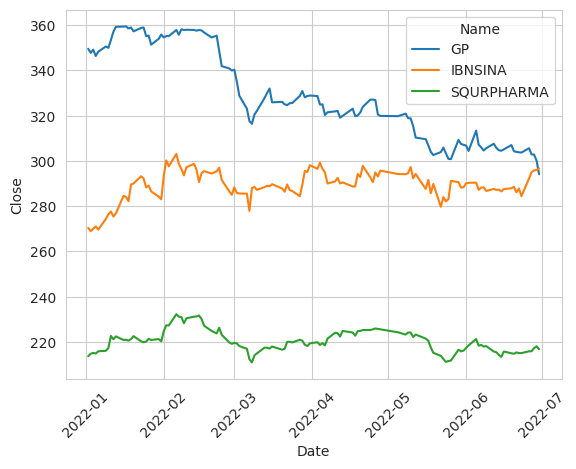

In [135]:
close_over_price= sns.lineplot(x='Date', y='Close', data=df_distribution,hue='Name')
close_over_price.tick_params(axis='x', labelrotation = 45)
sns.set_style("whitegrid")

In [136]:
df_distribution['Daily Change(%)'] = abs(df_distribution['Close'].pct_change()*100).round(2)
df_distribution

,Date,Name,Open,High,Low,Close,Volume,Daily Change(%)
3585,2022-01-02,GP,350.0,350.9,349.1,349.6,34527.0,NaN
3586,2022-01-03,GP,350.6,353.0,346.1,347.8,153227.0,0.51
3587,2022-01-04,GP,347.8,349.5,347.8,349.2,54663.0,0.40
3588,2022-01-05,GP,350.3,350.3,346.0,346.4,189855.0,0.80
3589,2022-01-06,GP,346.5,350.0,345.2,348.3,168718.0,0.55
...,...,...,...,...,...,...,...,...
48341,2022-06-26,SQURPHARMA,215.5,216.0,214.7,215.8,336352.0,0.37
48342,2022-06-27,SQURPHARMA,215.0,215.9,214.6,215.8,407444.0,0.00
48343,2022-06-28,SQURPHARMA,216.0,217.5,215.9,217.2,430790.0,0.65
48344,2022-06-29,SQURPHARMA,217.0,218.2,216.6,218.0,354071.0,0.37


<Axes: xlabel='Date', ylabel='Daily Change(%)'>

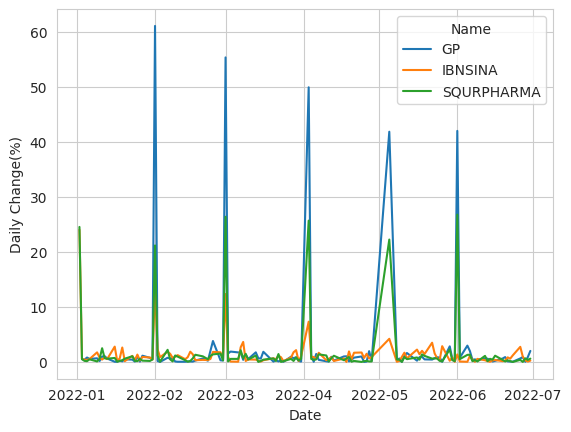

In [137]:
sns.lineplot(x='Date', y='Daily Change(%)', data=df_distribution, hue='Name')

In [138]:
df_distribution['Rolling Avg (30d)'] = df_distribution['Close'].rolling(window=30).mean()
df_distribution_GP= df_distribution[df_distribution['Name']== 'GP']
df_distribution_IBNSINA= df_distribution[df_distribution['Name']== 'IBNSINA']
df_distribution_SQURPHARMA= df_distribution[df_distribution['Name']== 'SQURPHARMA']


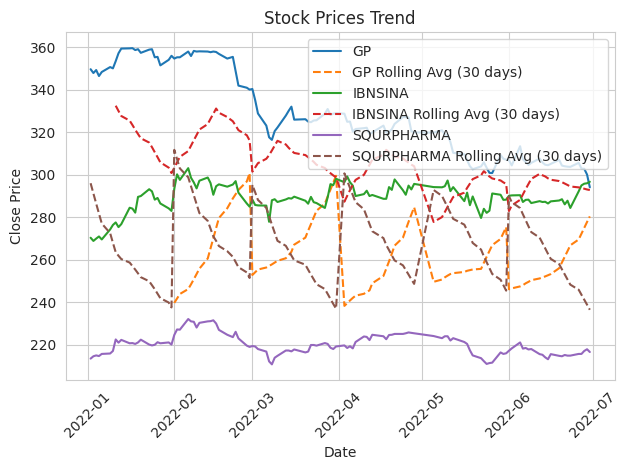

In [139]:
for name in df_distribution['Name'].unique():
  df_subset = df_distribution[df_distribution['Name'] == name]
  plt.plot(df_subset['Date'], df_subset['Close'], label=name)
  plt.plot(df_subset['Date'], df_subset['Rolling Avg (30d)'], linestyle='--', label=f"{name} Rolling Avg (30 days)")

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Prices Trend')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [140]:
pd.set_option('mode.chained_assignment',  None) # <=== BONUS SEGEMENT

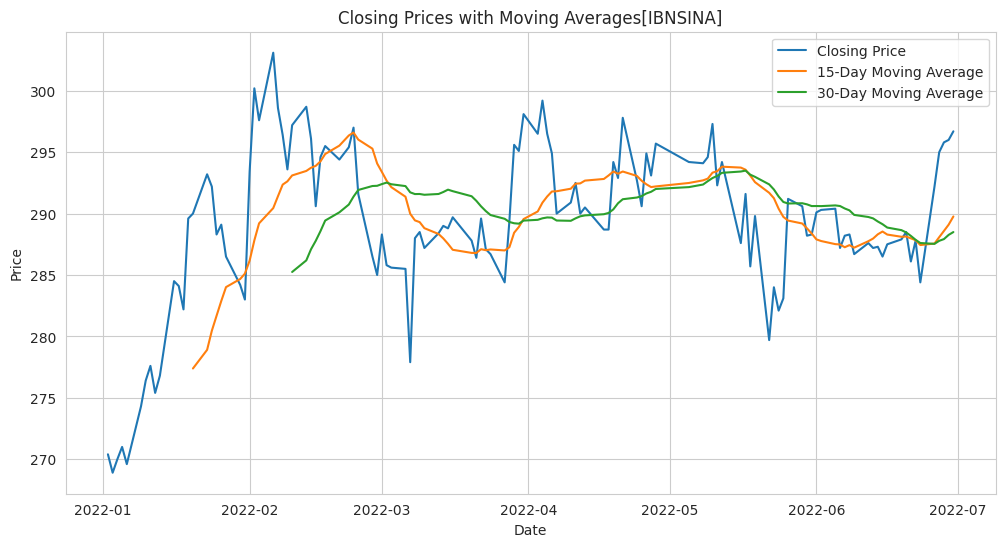

In [141]:
df_distribution_IBNSINA['Moving Average (15d)'] = df_distribution_IBNSINA['Close'].rolling(window=15).mean()
df_distribution_IBNSINA['Moving Average (30d)'] = df_distribution_IBNSINA['Close'].rolling(window=30).mean()

# Plot closing prices with moving averages
plt.figure(figsize=(12, 6))
plt.plot(df_distribution_IBNSINA['Date'], df_distribution_IBNSINA['Close'], label='Closing Price')
plt.plot(df_distribution_IBNSINA['Date'], df_distribution_IBNSINA['Moving Average (15d)'], label='15-Day Moving Average')
plt.plot(df_distribution_IBNSINA['Date'], df_distribution_IBNSINA['Moving Average (30d)'], label='30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Closing Prices with Moving Averages[IBNSINA]')
plt.grid(True)
plt.legend()
plt.show()

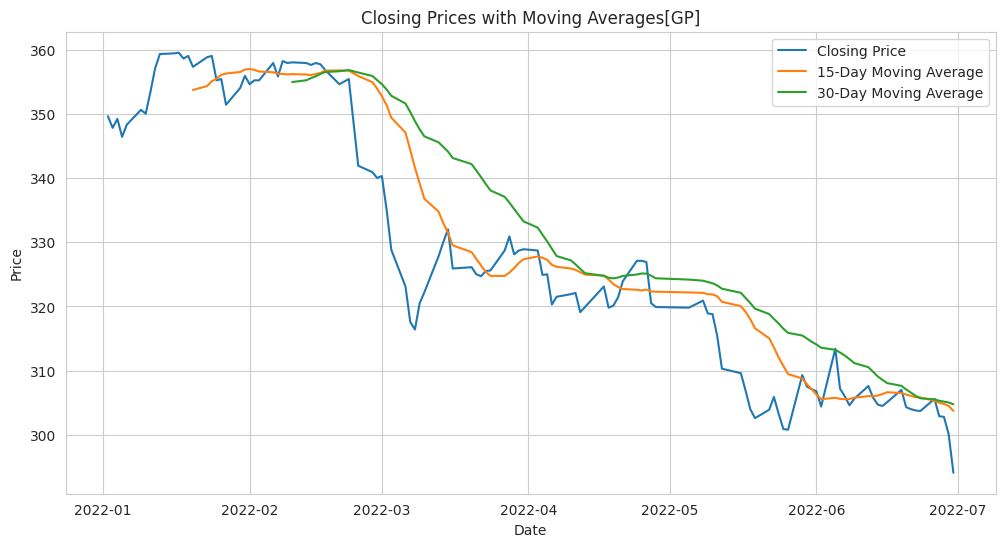

In [142]:
df_distribution_GP['Moving Average (15d)'] = df_distribution_GP['Close'].rolling(window=15).mean()
df_distribution_GP['Moving Average (30d)'] = df_distribution_GP['Close'].rolling(window=30).mean()

# Plot closing prices with moving averages
plt.figure(figsize=(12, 6))
plt.plot(df_distribution_GP['Date'], df_distribution_GP['Close'], label='Closing Price')
plt.plot(df_distribution_GP['Date'], df_distribution_GP['Moving Average (15d)'], label='15-Day Moving Average')
plt.plot(df_distribution_GP['Date'], df_distribution_GP['Moving Average (30d)'], label='30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Closing Prices with Moving Averages[GP]')
plt.grid(True)
plt.legend()
plt.show()

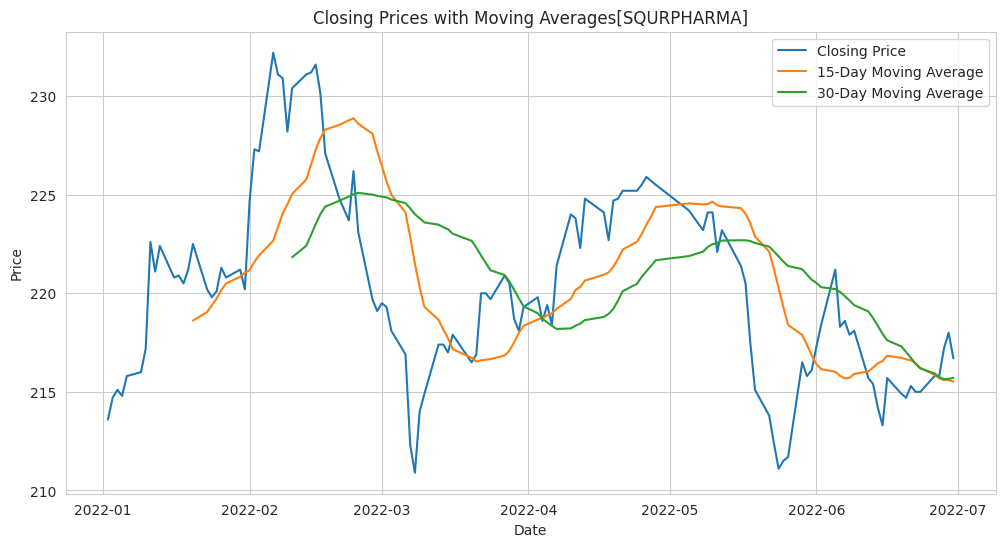

In [143]:
df_distribution_SQURPHARMA['Moving Average (15d)'] = df_distribution_SQURPHARMA['Close'].rolling(window=15).mean()
df_distribution_SQURPHARMA['Moving Average (30d)'] = df_distribution_SQURPHARMA['Close'].rolling(window=30).mean()

# Plot closing prices with moving averages
plt.figure(figsize=(12, 6))
plt.plot(df_distribution_SQURPHARMA['Date'], df_distribution_SQURPHARMA['Close'], label='Closing Price')
plt.plot(df_distribution_SQURPHARMA['Date'], df_distribution_SQURPHARMA['Moving Average (15d)'], label='15-Day Moving Average')
plt.plot(df_distribution_SQURPHARMA['Date'], df_distribution_SQURPHARMA['Moving Average (30d)'], label='30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Closing Prices with Moving Averages[SQURPHARMA]')
plt.grid(True)
plt.legend()
plt.show()

AMONG ALL COMPANIES

In [144]:
avg_prices_by_stock = df1.groupby('Name')['Close'].mean()
avg_prices_by_stock

Name
01.Bank                       21.260902
02.Cement                     96.600820
03.Ceramics_Sector            71.225164
04.Engineering               132.352459
05.Financial_Institutions     29.253525
                                ...    
WMSHIPYARD                    12.370492
YPL                           21.339344
ZAHEENSPIN                     9.964754
ZAHINTEX                       7.858197
ZEALBANGLA                   150.338525
Name: Close, Length: 412, dtype: float64

In [145]:
avg_prices_by_stock = df.groupby('Name')['Close'].mean()

top_5_stocks = avg_prices_by_stock.nlargest(5)
bottom_5_stocks = avg_prices_by_stock.nsmallest(5)

In [146]:
top_5_stocks

Name
APSCLBOND     5413.238636
RECKITTBEN    5342.024793
PREBPBOND     4918.357143
IBBL2PBOND    4851.330357
PBLPBOND      4836.195652
Name: Close, dtype: float64

In [147]:
bottom_5_stocks

Name
FAMILYTEX     4.698361
ICBIBANK      4.725620
FBFIF         5.289344
POPULAR1MF    5.368033
PHPMF1        5.417213
Name: Close, dtype: float64

# Part 3: Volatility Analysis:

  * Calculate and plot the rolling standard deviation of the 'Close' prices.
  * Create a new column for daily price change (Close - Open).
  * Analyze the distribution of daily price changes.
  * Identify days with the largest price increases and decreases.
  * Identify stocks with unusually high trading volume on certain days.

shown only for three company: IBNSINA, GP, SQURPHARMA

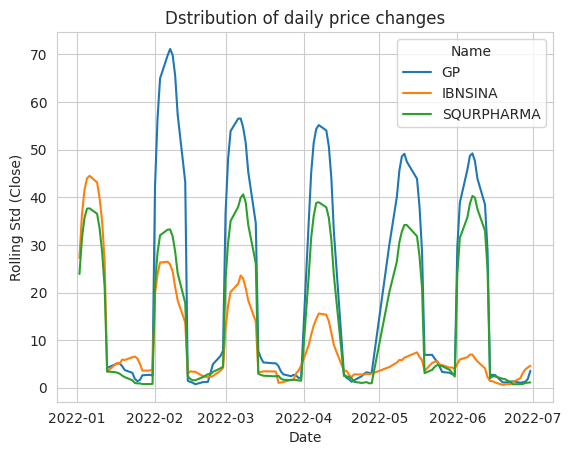

In [148]:
df_distribution['Rolling Std (Close)'] = df_distribution['Close'].rolling(window=10).std()
close_over_price= sns.lineplot(x='Date', y='Rolling Std (Close)', data=df_distribution,hue='Name').set_title('Dstribution of daily price changes')
sns.set_style("whitegrid")

In [149]:
df_distribution.head()

,Date,Name,Open,High,Low,Close,Volume,Daily Change(%),Rolling Avg (30d),Rolling Std (Close)
3585,2022-01-02,GP,350.0,350.9,349.1,349.6,34527.0,NaN,NaN,NaN
3586,2022-01-03,GP,350.6,353.0,346.1,347.8,153227.0,0.51,NaN,NaN
3587,2022-01-04,GP,347.8,349.5,347.8,349.2,54663.0,0.40,NaN,NaN
3588,2022-01-05,GP,350.3,350.3,346.0,346.4,189855.0,0.80,NaN,NaN
3589,2022-01-06,GP,346.5,350.0,345.2,348.3,168718.0,0.55,NaN,NaN


In [150]:
df_distribution['Daily Change'] = df_distribution['Close'] - df_distribution['Open']

In [151]:
findOutliers(df_distribution['Daily Change'])

[7.699999999999989,
 6.800000000000011,
 -7.400000000000034,
 10.399999999999977,
 7.099999999999966,
 -7.399999999999977,
 7.100000000000023,
 -9.899999999999977,
 -9.899999999999977,
 -10.299999999999955,
 -13.699999999999989,
 -9.199999999999989,
 -7.600000000000023,
 -7.199999999999989,
 5.699999999999989,
 10.699999999999989,
 6.5,
 7.699999999999989,
 5.800000000000011]

<Axes: xlabel='Date', ylabel='Daily Change'>

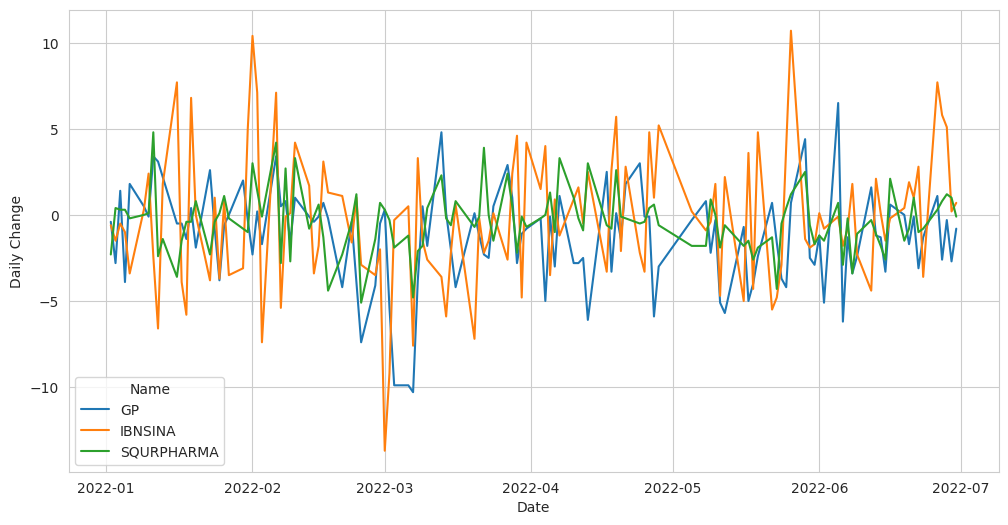

In [152]:
plt.figure(figsize=(12, 6))
sns.lineplot( x='Date', y='Daily Change', data=df_distribution,hue='Name')

In [153]:
max_increase = df_distribution['Daily Change'].max()
max_decrease = df_distribution['Daily Change'].min()

In [154]:
increase=df_distribution[df_distribution['Daily Change']==max_increase]['Date'].iloc[0].date()
decrease=df_distribution[df_distribution['Daily Change']==max_decrease]['Date'].iloc[0].date()

In [155]:
print(f"Day with the largest price increase: {increase}")
print(f"Day with the largest price decrease: {decrease}")

Day with the largest price increase: 2022-05-26
Day with the largest price decrease: 2022-03-01


Here I want to find unusual stocks on 2022-06-20 (AMONG ALL COMAPNIES)

In [156]:
df_on_specific_day= df1[df1['Date']=='2022-06-20']
# 1. Calculate the mean volume across all days
avg_volume = df_on_specific_day['Volume'].mean()

Q2 = df_on_specific_day['Volume'].median()
Q1 = df_on_specific_day['Volume'].describe()[4]
Q3 = df_on_specific_day['Volume'].describe()[6]
IQR = Q3 - Q1
uf = Q3 + 1.5 * IQR

# 2. Identify days with volume exceeding a threshold
high_volume = df_on_specific_day[df_on_specific_day['Volume'] > uf]
high_volume[['Date','Name','Volume']].reset_index(drop=True)


,Date,Name,Volume
0,2022-06-20,03.Ceramics_Sector,1606827.00
1,2022-06-20,11.Miscellaneous,1025172.47
2,2022-06-20,ALIF,2261193.00
3,2022-06-20,BDCOM,1476418.00
4,2022-06-20,BEXIMCO,5999271.00
5,2022-06-20,BSC,2829407.00
6,2022-06-20,CNATEX,1428350.00
7,2022-06-20,DACCADYE,1513317.00
8,2022-06-20,DSSL,1624314.00
9,2022-06-20,FBFIF,1063719.00


# Part 4: Correlation and Heatmaps:

  * Explore the relationship between trading volume and volatility.
  * Calculate the correlation matrix between the 'Open' & 'High', 'Low' &'Close' prices.
  * Create a heatmap to visualize the correlations using the seaborn package.

In [157]:
df_distribution['Daily Change'] = df_distribution['High'] - df_distribution['Low']

<Axes: xlabel='Daily Change', ylabel='Volume'>

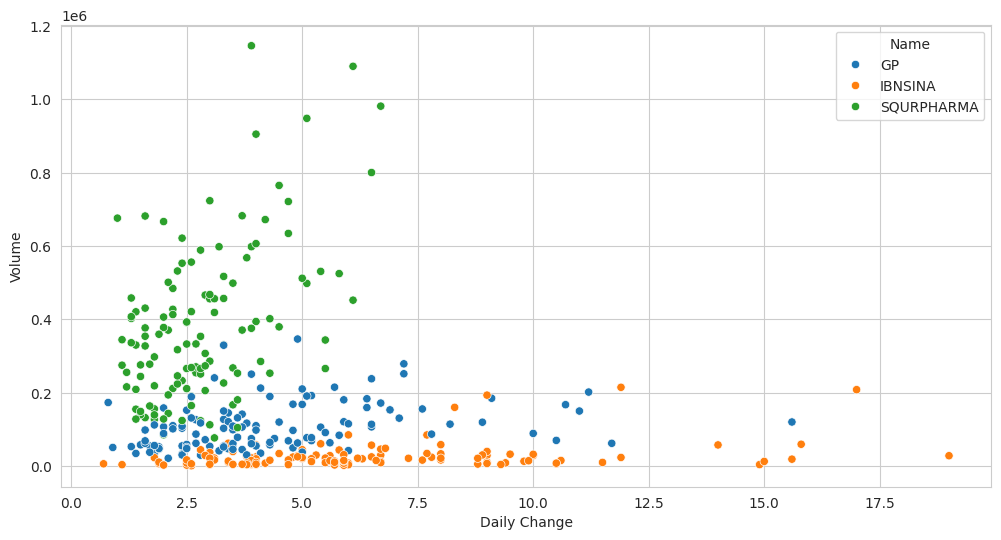

In [158]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Daily Change',y= 'Volume',data=df_distribution,hue='Name')

In [159]:
correlation_matrix_IBNSINA= df_distribution_IBNSINA[['Open', 'High', 'Low', 'Close']].corr()
correlation_matrix_GP= df_distribution_GP[['Open', 'High', 'Low', 'Close']].corr()
correlation_matrix_SQURPHARMA= df_distribution_SQURPHARMA[['Open', 'High', 'Low', 'Close']].corr()

In [160]:
print(f"correlation matrix between the 'Open' & 'High': {correlation_matrix_GP.loc['Open', 'High']}")
print(f"correlation matrix between the 'Low' &'Close': {correlation_matrix_GP.loc['Low', 'Close']}")

correlation matrix between the 'Open' & 'High': 0.9942040252121523
correlation matrix between the 'Low' &'Close': 0.9980024921172064


In [161]:
print(f"correlation matrix between the 'Open' & 'High': {correlation_matrix_IBNSINA.loc['Open', 'High']}")
print(f"correlation matrix between the 'Low' &'Close': {correlation_matrix_IBNSINA.loc['Low', 'Close']}")

correlation matrix between the 'Open' & 'High': 0.863446924099215
correlation matrix between the 'Low' &'Close': 0.9190568214649741


In [162]:
print(f"correlation matrix between the 'Open' & 'High': {correlation_matrix_SQURPHARMA.loc['Open', 'High']}")
print(f"correlation matrix between the 'Low' &'Close': {correlation_matrix_SQURPHARMA.loc['Low', 'Close']}")

correlation matrix between the 'Open' & 'High': 0.9643234366507273
correlation matrix between the 'Low' &'Close': 0.9771081860584981


<Axes: >

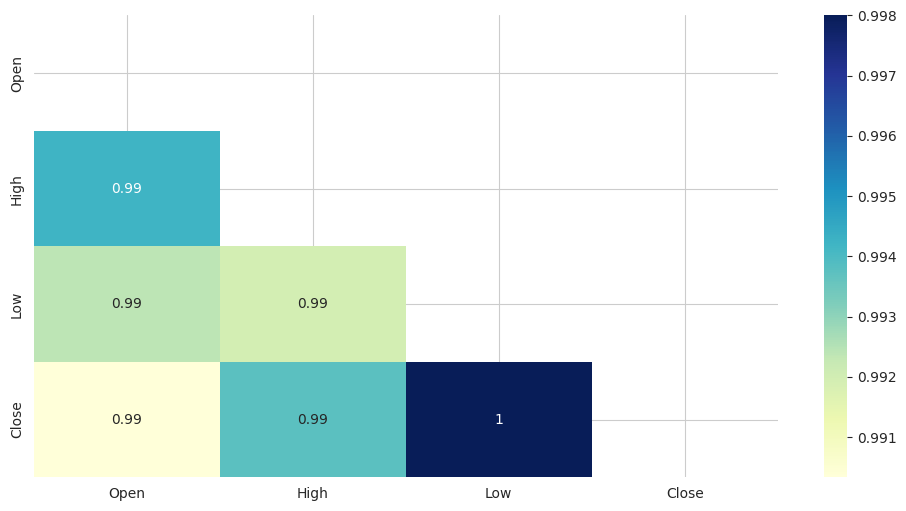

In [163]:
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix_GP, annot=True, cmap='YlGnBu', mask=np.triu(np.ones_like(correlation_matrix_GP, dtype=bool)))

<Axes: >

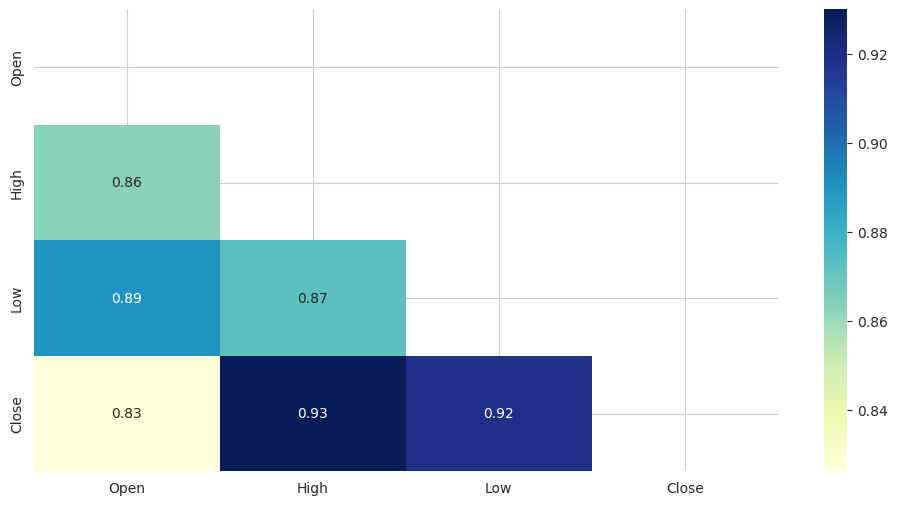

In [164]:
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix_IBNSINA, annot=True, cmap='YlGnBu', mask=np.triu(np.ones_like(correlation_matrix_IBNSINA, dtype=bool)))

<Axes: >

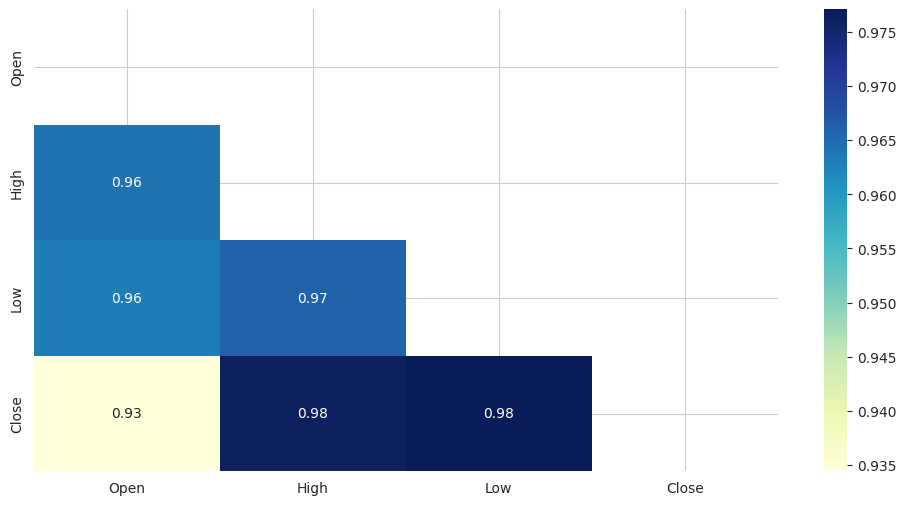

In [165]:
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix_SQURPHARMA, annot=True, cmap='YlGnBu', mask=np.triu(np.ones_like(correlation_matrix_SQURPHARMA, dtype=bool)))